In [1]:
from IPython.core.debugger import set_trace

### Merge Sort
Divide and conquer approach. 
1. Split array in have. **Divide function**
2. Recursive calls to main with each have. **Conquer (solving subproblems)**
3. Return the ourput of a **Merge function**

**Resources**: 
- [geekforgeeks](https://www.geeksforgeeks.org/merge-sort/)
- [simplified python](https://www.simplifiedpython.net/merge-sort-python/)

In [2]:
def merge(left_array, right_array):

    sorted_array = []
    left_index, right_index = 0, 0
    left_len = len(left_array)
    right_len = len(right_array)

#     while len(left_array[left_index:]) and len(right_array[right_index:]):
    while left_index < left_len and right_index < right_len:
        if left_array[left_index] <= right_array[right_index]:
            sorted_array.append(left_array[left_index])
            left_index += 1
        else:
            sorted_array.append(right_array[right_index])
            right_index += 1
    if left_array[left_index:]:
        sorted_array.extend(left_array[left_index:])
    else:
        sorted_array.extend(right_array[right_index:])
    
    return sorted_array

def merge_sort(array):
    # base case:
    if len(array) in [0, 1]: return array

    # divide
    middle = len(array)//2
    left_portion = array[:middle]
    right_portion = array[middle:]
    
    # recursive calls
    left_split = merge_sort(left_portion)
    right_split = merge_sort(right_portion)
    
    # conquer
    return merge(left_split, right_split)


In [3]:
assert merge_sort([]) == []
assert merge_sort([1]) == [1]
assert merge_sort([2,1]) == [1,2]
assert merge_sort([2,1,3]) == [1,2,3]
assert merge_sort([1,6,2,3,4,5]) == [1,2,3,4,5,6]

### QuickSort
Two partions types:
- partition index at the end: easer to implement but can lead to worst case more often
- partion index at middle (or at random place): amortized to worst case.

>`Partition index in the middle` (can be updated to be in any place)

In [1]:
def partition(array, start, end):
    p_index = (start + end)//2
    p_value = array[p_index]
    left_index = start
    right_index = end
    
    while left_index <= right_index:
        while left_index <= end and (array[left_index] < p_value or left_index == p_index):
            left_index += 1

        while right_index >= start and (array[right_index] > p_value or right_index == p_index):
            right_index -= 1

        if left_index < right_index:
            array[left_index], array[right_index] = array[right_index], array[left_index]
            left_index += 1
            right_index -= 1

    # in the last iteration, if left_index <= right_index then left++ (last swap) 
    # therefore, left position is updated innecesary since it fixed its value
    if left_index > start:
        left_index -= 1
    array[left_index], array[p_index] = array[p_index], array[left_index]
    return left_index

def _quick_sort(array, start, end):
    
    # base case
    if start > end: return array
    if not array: return array

    # divide
    partition_index = partition(array, start, end)
    _quick_sort(array, start, partition_index - 1)
    _quick_sort(array, partition_index + 1, end)

    return array

def quick_sort(array):
    return _quick_sort(array, 0, len(array)-1)


In [2]:
assert quick_sort([]) == []
assert quick_sort([-1]) == [-1]
assert quick_sort([5,2,9,14,4,11]) == sorted([5,2,9,14,4,11])
assert quick_sort([2,14,0,-1,80,6,4,4,4,1,9]) == sorted([2,14,0,-1,80,6,4,4,4,1,9])

>`Partition index at the end:`

In [31]:
def partition(_list, start, end):
    follower = leader = start

    while leader < end:
        if _list[leader] <= _list[end]:
            _list[follower], _list[leader] = _list[leader], _list[follower]
            follower += 1
        leader += 1

    _list[follower], _list[end] = _list[end], _list[follower]
    return follower

def _quicksort(xs, start, end):
    if start >= end: return xs
    if len(xs) == 0: return []
    
    p = partition(xs, start, end)
    _quicksort(xs, start, p-1)
    _quicksort(xs, p+1, end)
    
    return xs
    
def quick_sort(xs):
    return _quicksort(xs, 0, len(xs)-1)

In [32]:
assert quick_sort([]) == []
assert quick_sort([-1]) == [-1]
assert quick_sort([5,2,9,14,4,11]) == sorted([5,2,9,14,4,11])
assert quick_sort([2,14,0,-1,80,6,4,4,4,1,9]) == sorted([2,14,0,-1,80,6,4,4,4,1,9])

### HeapSort
- Using the heap data structure defined in `data-structures-implementation.ipnb`

In [1]:
def sift_down_element(heap, heap_size, parent):
    while parent < heap_size:
        
        left = parent*2 + 1
        right = parent*2 + 2
        largest = parent

        if left < heap_size and heap[largest] < heap[left]:
            largest = left

        if right < heap_size and heap[largest] < heap[right]:
            largest = right
            
        if largest != parent:
            heap[parent], heap[largest] = heap[largest], heap[parent]
            parent = largest
        else:
            break

def heapify(list_):
    size = len(list_)
    parent = (size//2)-1
    while parent >= 0:
        sift_down_element(list_, size, parent)
        parent -= 1

def heap_sort(list_):
    if not list_: return list_
    
    heapify(list_)
    size = len(list_)
    last = size - 1
    for i in range(last, 0, -1):
        list_[0], list_[i] = list_[i], list_[0]
        size -= 1
        sift_down_element(list_, size, 0)
    return list_


In [2]:
assert heap_sort([]) == []
assert heap_sort([-1]) == [-1]
assert heap_sort([5,2,9,14,4,11]) == sorted([5,2,9,14,4,11])
assert heap_sort([2,14,0,-1,80,6,4,4,4,1,9]) == sorted([2,14,0,-1,80,6,4,4,4,1,9])

### Depth first search
> Algorithm for `searching or traversing` Graph and Tree data structures.

> In the iterative case, a `stack` keeps track of the vertex being traversed. When a dead end is reached it pops the element.  
> For the recursive case a stack is no longer required.  

> `visited` is a variable used in order to prevent for infinite looping If there's a cycle. If a vertex has already been visited it stops the traversing.  
> `visited_list` is a variable that keeps track of the `traversing order` since a `python set` does not.

**Resources:**  
- [simple graph visualization](https://python-graph-gallery.com/321-custom-networkx-graph-appearance/)

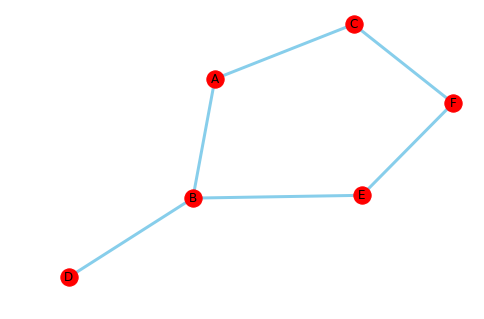

In [41]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'A', 'B', 'B', 'B', 'C', 'C', 'D', 'E', 'E', 'F', 'F'], 
                      'to':['B', 'C', 'A', 'D', 'E', 'A', 'F', 'B', 'B', 'F', 'C', 'E']})
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Chart with Custom edges:
nx.draw(G, with_labels=True, width=3, edge_color="skyblue", style="solid")

In [33]:
# Representing a graph as an adjacency list.
graph = {
         'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])
}

In [61]:
def dfs_iterative(graph, start):
    """
    Iterative implementation of depth first search for keep track
    of nodes in the order being visited starting from start vertex.
    
    visited: set object that helps performing difference operation
    visited_list: use to preserve the order of traversing since sets does not
    """

    visited, stack = set(), [start]
    visited_list = []

    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            visited_list.append(vertex)
        stack.extend(graph.get(vertex) - visited)
    return visited_list


def dfs_recursive(graph, start, visited=set(), visited_list=[]):
    """
    Recursive implementation of depth first search for keep track
    of nodes in the order being visited starting from start vertex.
    
    visited: set object that helps performing difference operation
    visited_list: use to preserve the order of traversing since sets does not
    """
    
    visited.add(start)
    if start not in visited_list: visited_list.append(start)

    for vertex in graph.get(start) - visited:
        dfs_recursive(graph, vertex, visited, visited_list)

    return visited_list

In [64]:
print('Traversing order from iterative implementation:', dfs_iterative(graph, 'A'))
print('Traversing order from recursive implementation:', dfs_recursive(graph, 'A'))

Traversing order from iterative implementation: ['A', 'B', 'E', 'F', 'C', 'D']
Traversing order from recursive implementation: ['A', 'C', 'F', 'E', 'B', 'D']
